<font size='5px' color='blue'/> Lending Club Analysis with Random Forest <font/>

# Random Forest intro

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.


We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) 

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

## 1 Packages

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

## 2 Explore Data

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
LendingClub=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI Projects/1 Machine Learning/Supervised/Lending Club(Random Forest Classification)/loan_data.csv')

In [20]:
print(LendingClub['int.rate'].max())
print(LendingClub['int.rate'].min())

0.2164
0.06


In [21]:
print(LendingClub['installment'].max())
print(LendingClub['installment'].min())

940.14
15.67


In [22]:
print(LendingClub['log.annual.inc'].max())
print(LendingClub['log.annual.inc'].min())

14.52835448
7.547501683


In [23]:
print(LendingClub['dti'].max())
print(LendingClub['dti'].min())

29.96
0.0


In [24]:
print(LendingClub['fico'].max())
print(LendingClub['fico'].min())

827
612


In [25]:
print(LendingClub['days.with.cr.line'].max())
print(LendingClub['days.with.cr.line'].min())

17639.95833
178.9583333


In [26]:
print(LendingClub['revol.bal'].max())
print(LendingClub['revol.bal'].min())

1207359
0


In [27]:
print(LendingClub['revol.util'].max())
print(LendingClub['revol.util'].min())

119.0
0.0


In [28]:
print(LendingClub['inq.last.6mths'].max())
print(LendingClub['inq.last.6mths'].min())

33
0


In [29]:
print(LendingClub['delinq.2yrs'].max())
print(LendingClub['delinq.2yrs'].min())

13
0


In [30]:
print(LendingClub['pub.rec'].max())
print(LendingClub['pub.rec'].min())

5
0


In [5]:
LendingClub.head(5)
    # Only purpose needs to be turned to dummy variable 

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


<Axes: xlabel='fico', ylabel='Count'>

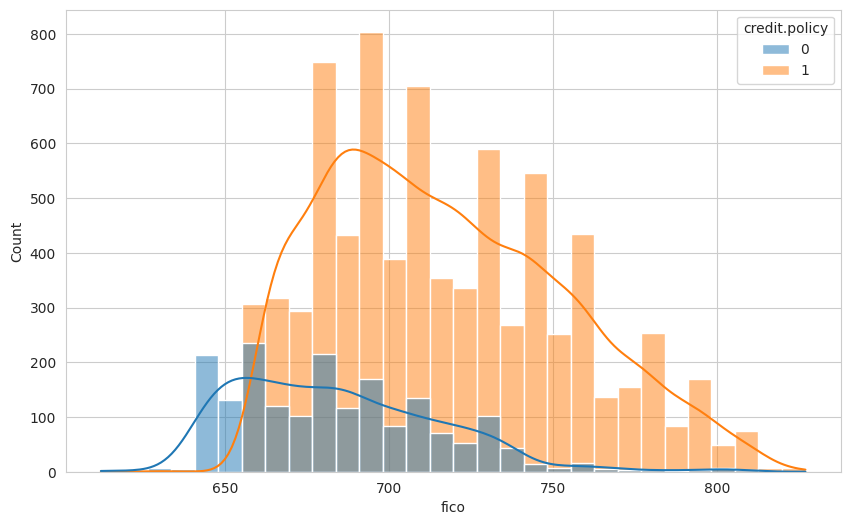

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(x='fico',data=LendingClub,hue='credit.policy',bins=30,kde=True)

<Axes: xlabel='fico', ylabel='Count'>

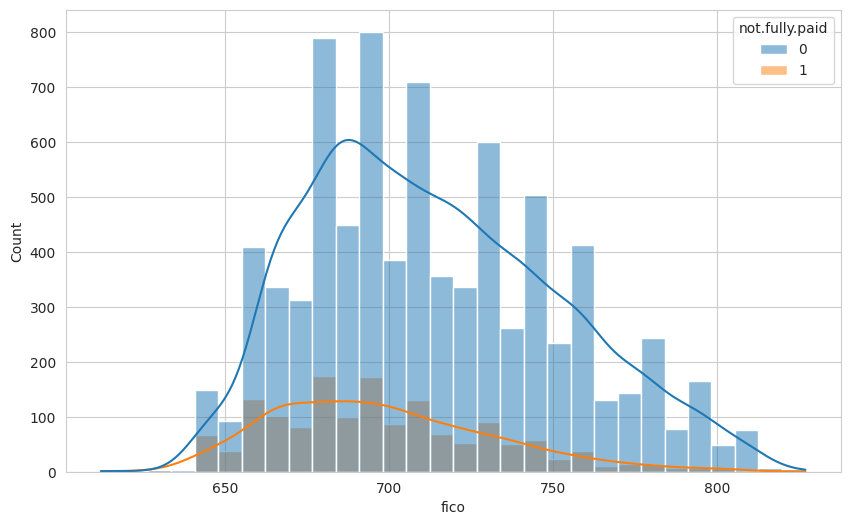

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(x='fico',data=LendingClub,hue='not.fully.paid',bins=30,kde=True)

- FICO, and Credit policy both are directly proportional to  propabiliby of getting money back

<Axes: xlabel='purpose', ylabel='count'>

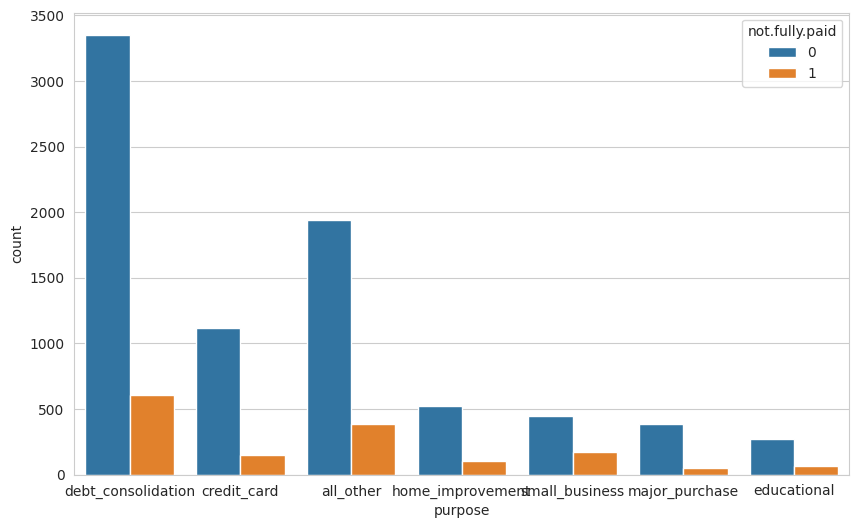

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose',hue=LendingClub['not.fully.paid'],data=LendingClub)

- Type of loans is important to predict the possability of getting your money back

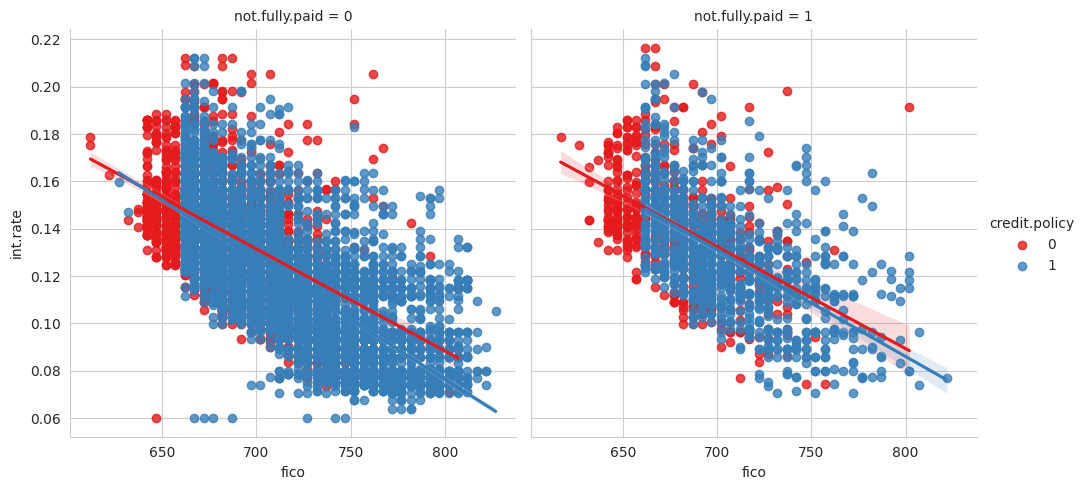

In [9]:
sns.lmplot(x='fico',y='int.rate',data=LendingClub,hue='credit.policy',palette='Set1',col='not.fully.paid')

- With increase in FICO score intrest rate decreases for all cases

## 3 Feature Engineering

## 3.1 Missing Data

<Axes: >

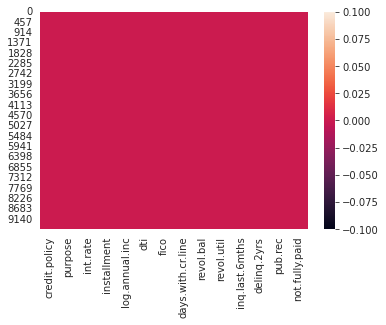

In [ ]:
sns.heatmap(LendingClub.isnull())

## 3.2 Dummy variable

In [10]:
Purpose=pd.get_dummies(LendingClub['purpose'],drop_first=True)

In [11]:
pd.concat([LendingClub,Purpose],axis=1)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


## 3.3 Drop Data

In [12]:
LendingClub.drop('purpose',axis=1,inplace=True)

In [13]:
LendingClub.head(5)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## 4 Preprocessing

In [14]:
X=LendingClub.drop('not.fully.paid',axis=1)

In [15]:
y=LendingClub['not.fully.paid']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

## 5 Training & Prediction

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
RFC=RandomForestClassifier(n_estimators=200)

In [20]:
RFC.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [21]:
y_pred=RFC.predict(X_test)

## 6 Evaluation

In [22]:
from sklearn.metrics import accuracy_score,explained_variance_score,classification_report,confusion_matrix

In [23]:
print(confusion_matrix(y_test,y_pred))

[[2422    9]
 [ 430   13]]


In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.59      0.03      0.06       443

    accuracy                           0.85      2874
   macro avg       0.72      0.51      0.49      2874
weighted avg       0.81      0.85      0.78      2874



In [25]:
print(accuracy_score(y_test,y_pred))

0.8472512178148921


In [ ]:
print(explained_variance_score(y_test,y_pred))

-0.01765012308100844


## 7 Save Model

In [26]:
from joblib import dump

In [27]:
dump(RFC, '/content/drive/MyDrive/Colab Notebooks/AI Projects/1 Machine Learning/Supervised/Lending Club(Random Forest Classification)/RFC_Train.joblib')

['/content/drive/MyDrive/Colab Notebooks/AI Projects/1 Machine Learning/Supervised/Lending Club(Random Forest Classification)/RFC_Train.joblib']

# 8 Deployment

In [4]:
import os

In [ ]:
!pip install streamlit
!pip install keras-cv-attention-models
!pip install pipreqs

In [9]:
!mkdir Lending_Club_Deployment

mkdir: cannot create directory ‘Lending_Club_Deployment’: File exists


In [10]:
%cd /content/Lending_Club_Deployment

/content/Lending_Club_Deployment


In [11]:
if not os.path.exists("app"):
    os.makedirs("app")
else:
    print('It exist')

## 8.1 Columns:

* credit_policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

* purpose: None

* int.rate: The interest rate of the loan (.11)

* installment: The monthly installments owed by the borrower if the loan is funded.( 0,1000)

* log.annual.inc: The natural log of the self-reported annual income of the borrower. (10.3,11.5)

* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).(1,20)

* fico: The FICO credit score of the borrower. (10,100)

* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from joblib import load
import sklearn

TITLE = "Lending Club"
st.title(TITLE)
DESCRIPTION = "Club connects people who need money (borrowers) with people who have money (investors)."
st.markdown(DESCRIPTION)



############################################## Machine Learning Model ##############################################

clf = load('/content/drive/MyDrive/Colab Notebooks/AI Projects/1 Machine Learning/Supervised/Lending Club(Random Forest Classification)/RFC_Trained.joblib')

credit_policy=st.selectbox('Do customer meets the credit underwriting criteria of LendingClub',['Yes','No])
if credit_policy=='Yes':
    credit_policy=1
else:
    credit_policy=0



age = f.slider(label='Age', min_value=0, max_value=120)
siblings_spouses = f.selectbox('Siblings and spouse aboard',
                                [i for i in range(0,10)])
parents_children = f.selectbox("Parents/Children aboard",
                                [i for i in range(0,10)])
min_fare, max_fare = get_fares_min_max(data)
fare = f.slider("Fare", min_fare, max_fare, 150.0)

submitted = f.form_submit_button(label='Submit!')
if submitted:
    my_data = np.array([p_class, age, siblings_spouses, parents_children,
                        fare, sex_female, sex_male])
    try:
        prediction = clf.predict([my_data])
    except Exception as e:
        f.error(f"Could not make prediction. {e}")
    if prediction[0] == 0:
        st.error("Sorry! You would not survive :(")
    else:
        st.warning("Woot! You would survive!")



In [ ]:
! streamlit run app.py & npx localtunnel --port 8501

In [ ]:
!pipreqs .